# Imports:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

In [2]:
import statsmodels.api as sm

from matplotlib import __version__ as mpl_ver
from ipympl import __version__ as ipy_ver

In [3]:
%matplotlib widget

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the two vectors that span the first plane
v1 = np.array([1, 1, 1])
v2 = np.array([0, 2, -2])

# Define the third vector (point)
v3 = np.array([3, 1, 2])

# Define two more vectors that span a second plane
v4, v5 = v1.copy(), v2.copy()
v4[1] = 0
v5[1] = 0

### option 1:

Vector Information:
v1 (red): [1 1 1]
v2 (blue): [ 0  2 -2]
v3 (dark blue point): [3 1 2]
v4 (orange): [1 0 1]
v5 (green): [ 0  0 -2]

Plane 1 normal: [-0.81649658  0.40824829  0.40824829]

v3 projected onto plane 1: [2.  1.5 2.5]

Residual from plane 1 (purple): [ 1.  -0.5 -0.5]
Residual magnitude: 1.225

Angles between residual and vectors:
Residual ∠ v4: 73.22°
Residual ∠ v5: 65.91°

Verification - Plane 1 orthogonality:
Residual · v1 = 0.000000 (should be ~0)
Residual · v2 = 0.000000 (should be ~0)


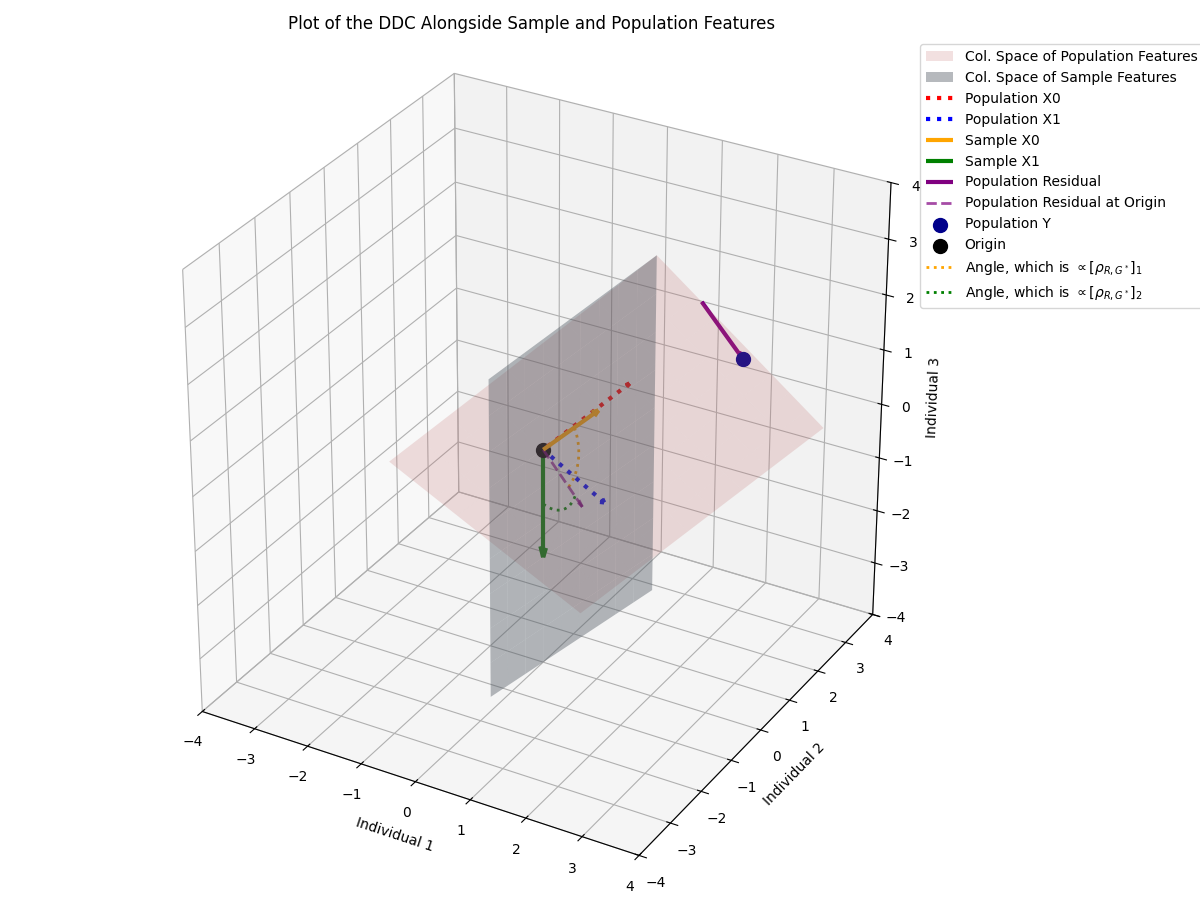

In [19]:
# Calculate the normal vector to the first plane using cross product
normal1 = np.cross(v1, v2)
normal1 = normal1 / np.linalg.norm(normal1)  # normalize

# Project v3 onto the first plane
# The projection formula: proj = v3 - ((v3 · n) * n)
projection_onto_plane1 = v3 - np.dot(v3, normal1) * normal1

# Calculate the orthogonal residual vector from plane 1
residual1 = v3 - projection_onto_plane1

# Function to calculate angle between two vectors in degrees
def angle_between_vectors(u, v):
    cos_angle = np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))
    # Clamp to avoid numerical errors
    cos_angle = np.clip(cos_angle, -1.0, 1.0)
    return np.degrees(np.arccos(cos_angle))

# Function to draw angle arc between two vectors
def draw_angle_arc(ax, start_point, vec1, vec2, radius=0.5, color='black', label=None, linestyle=':'):
    # Normalize vectors
    v1_norm = vec1 / np.linalg.norm(vec1)
    v2_norm = vec2 / np.linalg.norm(vec2)
    
    # Calculate angle
    angle = np.arccos(np.clip(np.dot(v1_norm, v2_norm), -1.0, 1.0))
    
    # Create arc points
    n_points = 20
    # Create a coordinate system with v1_norm as x-axis
    # Find a vector perpendicular to v1_norm in the plane of v1_norm and v2_norm
    cross = np.cross(v1_norm, v2_norm)
    if np.linalg.norm(cross) < 1e-10:  # vectors are parallel
        return
    
    # Create rotation axis (perpendicular to the plane containing both vectors)
    rotation_axis = cross / np.linalg.norm(cross)
    
    # Generate arc points by rotating v1_norm towards v2_norm
    arc_points = []
    for i in range(n_points + 1):
        theta = angle * i / n_points
        # Rodrigues' rotation formula
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)
        rotated_vec = (v1_norm * cos_theta + 
                      np.cross(rotation_axis, v1_norm) * sin_theta + 
                      rotation_axis * np.dot(rotation_axis, v1_norm) * (1 - cos_theta))
        arc_points.append(start_point + radius * rotated_vec)
    
    arc_points = np.array(arc_points)
    ax.plot(arc_points[:, 0], arc_points[:, 1], arc_points[:, 2], 
            color=color, linewidth=2, linestyle=linestyle, label=label)
    
    return arc_points

# Calculate angles between residual vector and the second plane vectors
angle_residual1_v4 = angle_between_vectors(residual1, v4)
angle_residual1_v5 = angle_between_vectors(residual1, v5)
# Calculate angle between residual and v3 - removed

# Create grids for both planes visualization
# First plane: linear combination of v1 and v2
u1 = np.linspace(-1, 2, 10)
v1_grid = np.linspace(-1, 2, 10)
U1, V1_grid = np.meshgrid(u1, v1_grid)

X1 = U1 * v1[0] + V1_grid * v2[0]
Y1 = U1 * v1[1] + V1_grid * v2[1]
Z1 = U1 * v1[2] + V1_grid * v2[2]

# Second plane: linear combination of v4 and v5
u2 = np.linspace(-1, 2, 10)
v2_grid = np.linspace(-1, 2, 10)
U2, V2_grid = np.meshgrid(u2, v2_grid)

X2 = U2 * v4[0] + V2_grid * v5[0]
Y2 = U2 * v4[1] + V2_grid * v5[1]
Z2 = U2 * v4[2] + V2_grid * v5[2]

# Create the 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot both planes with more distinctive colors
ax.plot_surface(X1, Y1, Z1, alpha=0.2, color='lightcoral', label='Col. Space of Population Features')
ax.plot_surface(X2, Y2, Z2, alpha=0.4, color='lightsteelblue', label='Col. Space of Sample Features')

# Plot the spanning vectors for both planes
origin = np.array([0, 0, 0])
# v1 and v2 with dotted style to distinguish from v4, v5
ax.quiver(origin[0], origin[1], origin[2], v1[0], v1[1], v1[2], 
          color='red', arrow_length_ratio=0.1, linewidth=3, linestyle=':', label='Population X0')
ax.quiver(origin[0], origin[1], origin[2], v2[0], v2[1], v2[2], 
          color='blue', arrow_length_ratio=0.1, linewidth=3, linestyle=':', label='Population X1')
# v4 and v5 with solid style
ax.quiver(origin[0], origin[1], origin[2], v4[0], v4[1], v4[2], 
          color='orange', arrow_length_ratio=0.1, linewidth=3, label='Sample X0')
ax.quiver(origin[0], origin[1], origin[2], v5[0], v5[1], v5[2], 
          color='green', arrow_length_ratio=0.1, linewidth=3, label='Sample X1')

# Plot the third vector (point) - removed, will only show as dot below

# Plot the projection of v3 onto the plane - removed, will only show as dot below

# Plot the orthogonal residual vector from plane 1
ax.quiver(projection_onto_plane1[0], projection_onto_plane1[1], projection_onto_plane1[2],
          residual1[0], residual1[1], residual1[2], 
          color='purple', arrow_length_ratio=0.1, linewidth=3, label='Population Residual')

# Plot the residual vector again at the origin for angle visualization
ax.quiver(origin[0], origin[1], origin[2], residual1[0], residual1[1], residual1[2], 
          color='purple', arrow_length_ratio=0.1, linewidth=2, linestyle='--', 
          alpha=0.7, label='Population Residual at Origin')

# Mark important points
ax.scatter(*v3, color='darkblue', s=100, label='Population Y')
ax.scatter(*origin, color='black', s=100, label='Origin')

# Add connection line from projection to point
ax.plot([projection_onto_plane1[0], v3[0]], 
        [projection_onto_plane1[1], v3[1]], 
        [projection_onto_plane1[2], v3[2]], 
        'purple', linewidth=2, linestyle=':')

# Draw angle arcs from the origin
# Angle between residual and v4 (both from origin) - use same color as v4
draw_angle_arc(ax, origin, residual1, v4, 
               radius=0.8, color='orange', label=r"Angle, which is $\propto [\rho_{R, G^*}]_1$")

# Angle between residual and v5 (both from origin) - use same color as v5
draw_angle_arc(ax, origin, residual1, v5, 
               radius=1.0, color='green', label=r"Angle, which is $\propto [\rho_{R, G^*}]_2$")

# Set labels and title
ax.set_xlabel('Individual 1')
ax.set_ylabel('Individual 2')
ax.set_zlabel('Individual 3')
ax.set_title('Plot of the DDC Alongside Sample and Population Features')

# Set axis limits to tighter bounds
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])

# Add legend
ax.legend(bbox_to_anchor=(0.95, 1), loc='upper left')

# Set equal aspect ratio for better visualization
ax.set_box_aspect([1,1,1])

# Print comprehensive information
print("Vector Information:")
print(f"v1 (red): {v1}")
print(f"v2 (blue): {v2}")
print(f"v3 (dark blue point): {v3}")
print(f"v4 (orange): {v4}")
print(f"v5 (green): {v5}")
print(f"\nPlane 1 normal: {normal1}")
print(f"\nv3 projected onto plane 1: {projection_onto_plane1}")
print(f"\nResidual from plane 1 (purple): {residual1}")
print(f"Residual magnitude: {np.linalg.norm(residual1):.3f}")

print(f"\nAngles between residual and vectors:")
print(f"Residual ∠ v4: {angle_residual1_v4:.2f}°")
print(f"Residual ∠ v5: {angle_residual1_v5:.2f}°")

# Verify orthogonality for plane 1
print(f"\nVerification - Plane 1 orthogonality:")
print(f"Residual · v1 = {np.dot(residual1, v1):.6f} (should be ~0)")
print(f"Residual · v2 = {np.dot(residual1, v2):.6f} (should be ~0)")

plt.tight_layout()
plt.show()

## v2:

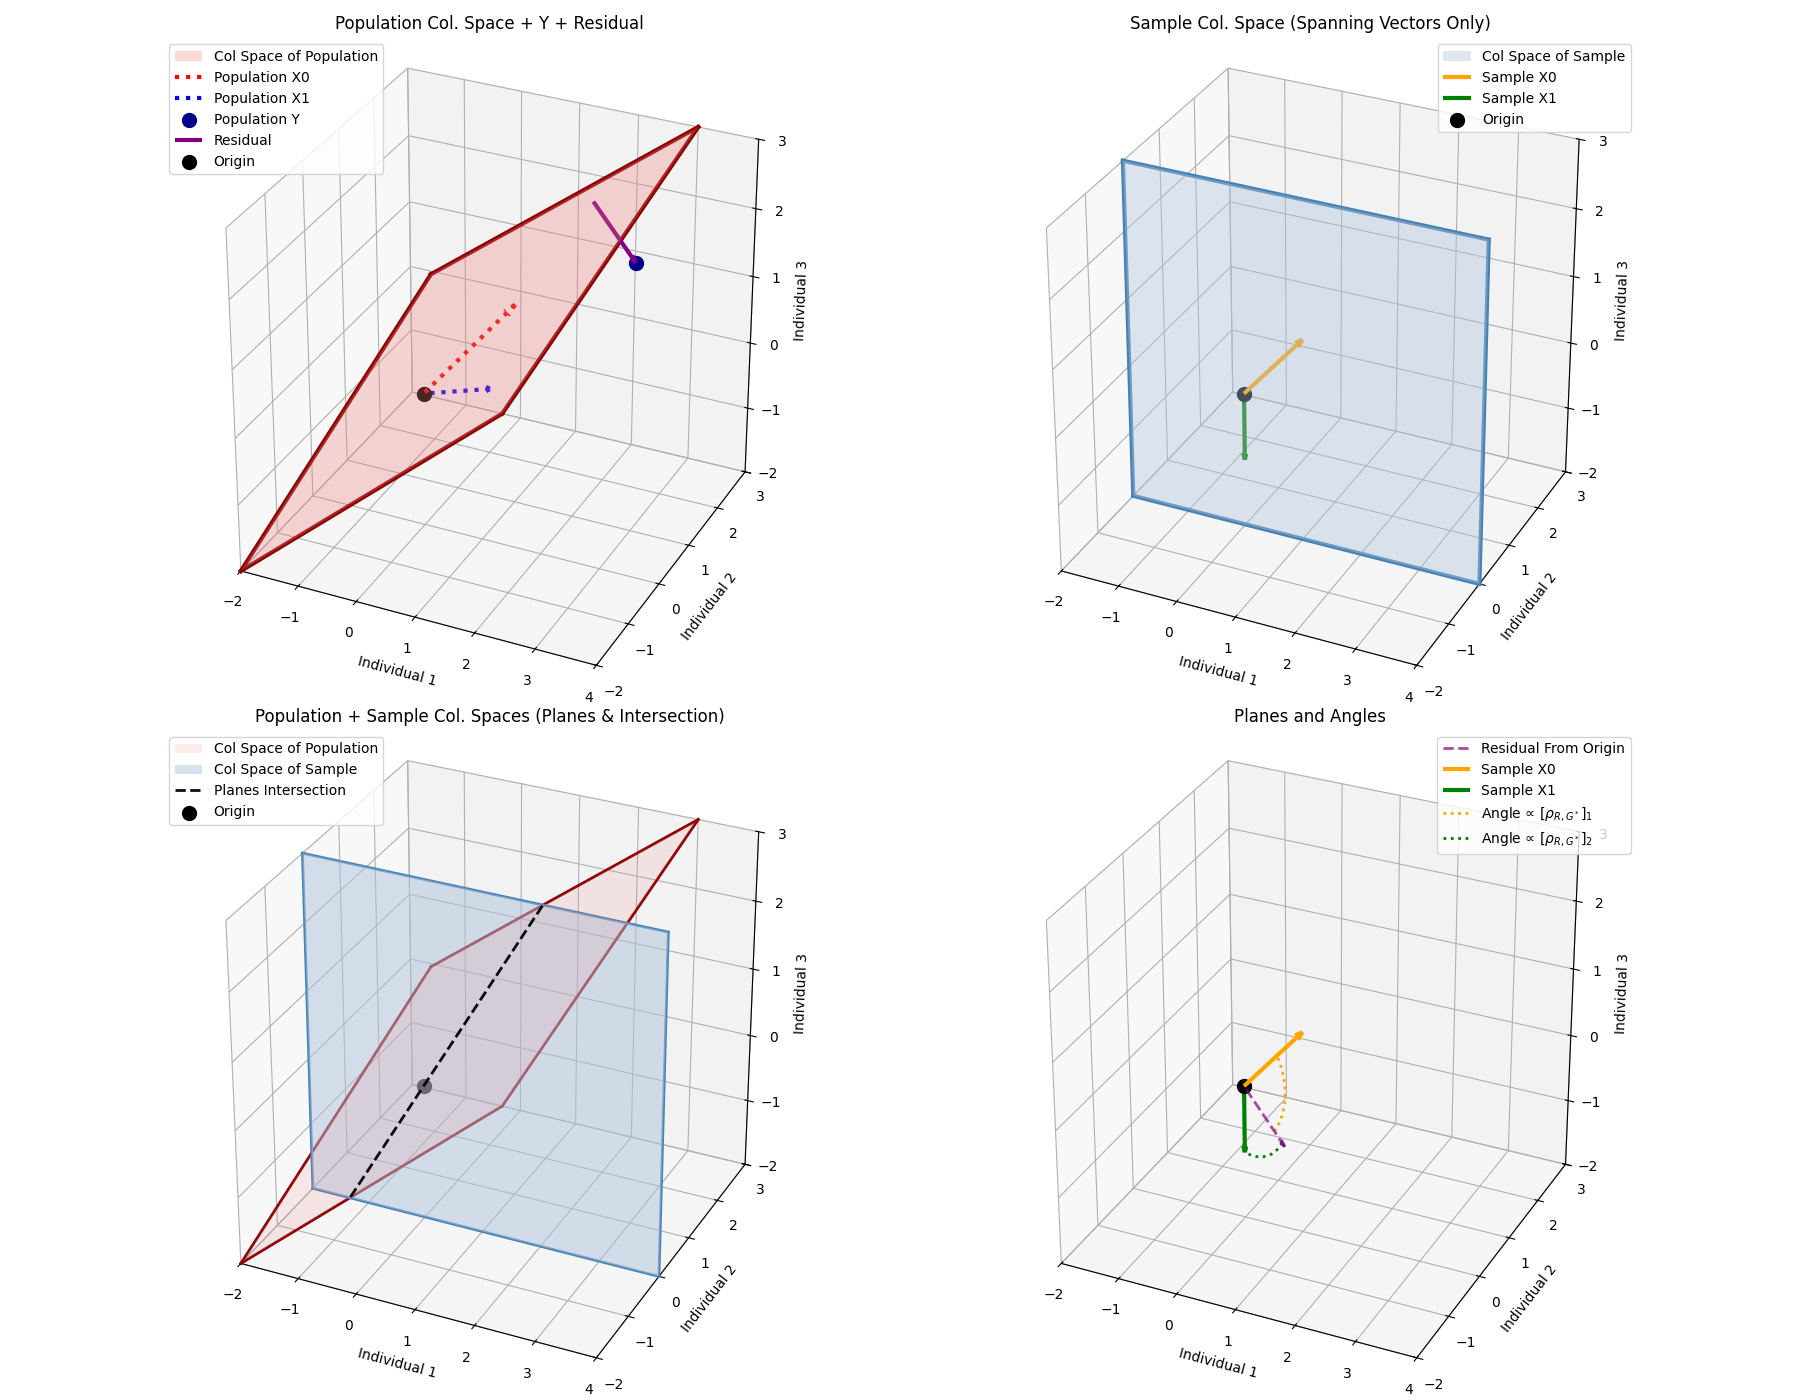

Population plane normal: [-3  1  2]
Sample plane normal: [0 1 0]
Intersection point: [-0.  0.  0.]
Intersection direction: [-0.5547002   0.         -0.83205029]
Angle between planes (degrees): 74.498640433063


In [15]:
elev = 30
azim = -65

# Define the two vectors that span the first plane
v1 = np.array([1, 1, 1])
v2 = np.array([0, 2, -1])

# Define the third vector (point)
v3 = np.array([3, 1, 2])

# Define two more vectors that span a second plane
v4, v5 = v1.copy(), v2.copy()
v4[1] = 0
v5[1] = 0

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull

# ============= Settings ============ #
xlim = (-2, 4)
ylim = (-2, 3)
zlim = (-2, 3)

origin = np.zeros(3)

# ---------- Plane definitions ----------- #
def plane_params_from_vectors(vA, vB, origin):
    normal = np.cross(vA, vB)
    return normal, origin

def intersection_with_box(normal, origin, xlim, ylim, zlim):
    bounds = [
        (xlim[0], xlim[1]),
        (ylim[0], ylim[1]),
        (zlim[0], zlim[1])
    ]
    points = []
    for xi in bounds[0]:
        for yi in bounds[1]:
            if abs(normal[2]) > 1e-10:
                zi = ( -normal[0]*(xi-origin[0]) - normal[1]*(yi-origin[1]) ) / normal[2] + origin[2]
                if zlim[0]-1e-12 <= zi <= zlim[1]+1e-12:
                    points.append([xi, yi, zi])
    for xi in bounds[0]:
        for zi in bounds[2]:
            if abs(normal[1]) > 1e-10:
                yi = ( -normal[0]*(xi-origin[0]) - normal[2]*(zi-origin[2]) ) / normal[1] + origin[1]
                if ylim[0]-1e-12 <= yi <= ylim[1]+1e-12:
                    points.append([xi, yi, zi])
    for yi in bounds[1]:
        for zi in bounds[2]:
            if abs(normal[0]) > 1e-10:
                xi = ( -normal[1]*(yi-origin[1]) - normal[2]*(zi-origin[2]) ) / normal[0] + origin[0]
                if xlim[0]-1e-12 <= xi <= xlim[1]+1e-12:
                    points.append([xi, yi, zi])
    pts = np.unique(np.round(points, decimals=8), axis=0)
    if len(pts) < 3:
        return pts
    pts_centered = pts - origin
    if abs(normal[0]) < 0.5:
        tmpv = np.array([1.0,0.0,0.0])
    else:
        tmpv = np.array([0.0,1.0,0.0])
    xdir = np.cross(normal, tmpv).astype(float)
    xdir = xdir / np.linalg.norm(xdir)
    ydir = np.cross(normal, xdir).astype(float)
    ydir = ydir / np.linalg.norm(ydir)
    x_coords = np.dot(pts_centered, xdir)
    y_coords = np.dot(pts_centered, ydir)
    hull_points = np.stack([x_coords, y_coords], axis=1)
    try:
        hull = ConvexHull(hull_points)
        idxs = hull.vertices
        polygon_pts = pts[idxs]
    except Exception:
        polygon_pts = pts
    return polygon_pts

def plane_axis_intersections(normal, origin, xlim, ylim, zlim):
    axes_pts = []
    if normal[0] != 0:
        x = origin[0]
        y = 0
        z = 0
        x_solve = -normal[1]*(y-origin[1]) - normal[2]*(z-origin[2])
        x_solve = x_solve/normal[0] + origin[0]
        if xlim[0]-1e-12 <= x_solve <= xlim[1]+1e-12:
            axes_pts.append([x_solve,0,0])
    if normal[1] != 0:
        y_solve = -normal[0]*(0-origin[0]) - normal[2]*(0-origin[2])
        y_solve = y_solve/normal[1] + origin[1]
        if ylim[0]-1e-12 <= y_solve <= ylim[1]+1e-12:
            axes_pts.append([0,y_solve,0])
    if normal[2] != 0:
        z_solve = -normal[0]*(0-origin[0]) - normal[1]*(0-origin[1])
        z_solve = z_solve/normal[2] + origin[2]
        if zlim[0]-1e-12 <= z_solve <= zlim[1]+1e-12:
            axes_pts.append([0,0,z_solve])
    return axes_pts

def plane_plane_intersection(n1, p1, n2, p2):
    """Find intersection line between two planes"""
    direction = np.cross(n1, n2)
    direction_norm = np.linalg.norm(direction)
    if direction_norm < 1e-10:
        return None, None  # parallel planes
    direction = direction / direction_norm
    
    # Find a point on the intersection line
    # We need to solve the system: n1·x = d1, n2·x = d2
    d1 = np.dot(n1, p1)
    d2 = np.dot(n2, p2)
    
    # Choose the coordinate with largest component in direction vector
    abs_dir = np.abs(direction)
    max_idx = np.argmax(abs_dir)
    
    # Set that coordinate to 0 and solve for the other two
    other_indices = [i for i in range(3) if i != max_idx]
    
    # Create 2x2 system for the other coordinates
    A = np.array([[n1[other_indices[0]], n1[other_indices[1]]],
                  [n2[other_indices[0]], n2[other_indices[1]]]])
    b = np.array([d1, d2])
    
    try:
        sol = np.linalg.solve(A, b)
        point = np.zeros(3)
        point[other_indices[0]] = sol[0]
        point[other_indices[1]] = sol[1]
        point[max_idx] = 0  # We set this coordinate to 0
        return point, direction
    except:
        return None, None

def line_box_intersection_improved(point, direction, xlim, ylim, zlim):
    """Find where a line intersects the bounding box"""
    t_values = []
    
    # Check intersection with each face of the box
    for axis in range(3):
        if abs(direction[axis]) > 1e-10:
            # Check both min and max faces for this axis
            for bound in [xlim, ylim, zlim][axis]:
                t = (bound - point[axis]) / direction[axis]
                intersection_point = point + t * direction
                
                # Check if intersection point is within the other bounds
                valid = True
                limits = [xlim, ylim, zlim]
                for other_axis in range(3):
                    if other_axis != axis:
                        if not (limits[other_axis][0] - 1e-10 <= intersection_point[other_axis] <= limits[other_axis][1] + 1e-10):
                            valid = False
                            break
                
                if valid:
                    t_values.append(t)
    
    if len(t_values) < 2:
        return None
    
    # Take the two most extreme t values to get the full segment
    t_values = sorted(t_values)
    t_min, t_max = t_values[0], t_values[-1]
    
    p1 = point + t_min * direction
    p2 = point + t_max * direction
    
    return np.array([p1, p2])

def project_point_to_plane(pt, normal, origin):
    to_pt = pt - origin
    dist = np.dot(normal, to_pt) / np.linalg.norm(normal)
    projection = pt - dist * (normal / np.linalg.norm(normal))
    return projection

# Calculate planes and intersections
pop_plane_normal, pop_plane_origin = plane_params_from_vectors(v1, v2, origin)
sample_plane_normal, sample_plane_origin = plane_params_from_vectors(v4, v5, origin)
pop_polygon = intersection_with_box(pop_plane_normal, pop_plane_origin, xlim, ylim, zlim)
sample_polygon = intersection_with_box(sample_plane_normal, sample_plane_origin, xlim, ylim, zlim)

pop_axis_pts = plane_axis_intersections(pop_plane_normal, pop_plane_origin, xlim, ylim, zlim)
sample_axis_pts = plane_axis_intersections(sample_plane_normal, sample_plane_origin, xlim, ylim, zlim)

projection_onto_plane1 = project_point_to_plane(v3, pop_plane_normal, origin)
residual1 = v3 - projection_onto_plane1

fig = plt.figure(figsize=(18, 14))

# --- Subplot 1 : Population col space + Y + Residual --- #
ax1 = fig.add_subplot(221, projection='3d')
plane_pop = Poly3DCollection([pop_polygon], facecolors='lightcoral', alpha=0.30, label="Col Space of Population")
ax1.add_collection3d(plane_pop)
polygon = pop_polygon
polygon_closed = np.vstack([polygon, polygon[0]]) if not np.allclose(polygon[0], polygon[-1]) else polygon
for i in range(len(polygon_closed)-1):
    ax1.plot([polygon_closed[i,0], polygon_closed[i+1,0]], [polygon_closed[i,1], polygon_closed[i+1,1]], [polygon_closed[i,2], polygon_closed[i+1,2]], color='darkred', linewidth=3)
for pt in pop_axis_pts:
    ax1.plot([0,pt[0]], [0,pt[1]], [0,pt[2]], color='k', linewidth=3, linestyle='--')
ax1.quiver(*origin, *v1, color='red', arrow_length_ratio=0.1, linewidth=3, linestyle=':', label='Population X0')
ax1.quiver(*origin, *v2, color='blue', arrow_length_ratio=0.1, linewidth=3, linestyle=':', label='Population X1')
ax1.scatter(*v3, color='darkblue', s=100, label='Population Y')
ax1.quiver(*projection_onto_plane1, *residual1, color='purple', arrow_length_ratio=0.1, linewidth=3, label='Residual')
ax1.scatter(*origin, color='black', s=100, label='Origin')
ax1.view_init(elev=elev, azim=azim)
ax1.set_title("Population Col. Space + Y + Residual")

# --- Subplot 2: Sample plane --- #
ax2 = fig.add_subplot(222, projection='3d')
plane_sample = Poly3DCollection([sample_polygon], facecolors='lightsteelblue', alpha=0.40, label="Col Space of Sample")
ax2.add_collection3d(plane_sample)
polygon = sample_polygon
polygon_closed = np.vstack([polygon, polygon[0]]) if not np.allclose(polygon[0], polygon[-1]) else polygon
for i in range(len(polygon_closed)-1):
    ax2.plot([polygon_closed[i,0], polygon_closed[i+1,0]], [polygon_closed[i,1], polygon_closed[i+1,1]], [polygon_closed[i,2], polygon_closed[i+1,2]], color='steelblue', linewidth=3)
for pt in sample_axis_pts:
    ax2.plot([0,pt[0]], [0,pt[1]], [0,pt[2]], color='k', linewidth=3, linestyle='--')
ax2.quiver(*origin, *v4, color='orange', arrow_length_ratio=0.1, linewidth=3, label='Sample X0')
ax2.quiver(*origin, *v5, color='green', arrow_length_ratio=0.1, linewidth=3, label='Sample X1')
ax2.scatter(*origin, color='black', s=100, label='Origin')
ax2.view_init(elev=elev, azim=azim)
ax2.set_title("Sample Col. Space (Spanning Vectors Only)")

# --- Subplot 3 : Population + Sample planes, with intersection line --- #
ax3 = fig.add_subplot(223, projection='3d')

# Draw population plane
plane_pop3 = Poly3DCollection([pop_polygon], facecolors='lightcoral', alpha=0.15, label="Col Space of Population", zorder=1)
ax3.add_collection3d(plane_pop3)
polygon = pop_polygon
polygon_closed = np.vstack([polygon, polygon[0]]) if not np.allclose(polygon[0], polygon[-1]) else polygon
for i in range(len(polygon_closed)-1):
    ax3.plot(
        [polygon_closed[i,0], polygon_closed[i+1,0]],
        [polygon_closed[i,1], polygon_closed[i+1,1]],
        [polygon_closed[i,2], polygon_closed[i+1,2]],
        color='darkred', linewidth=2, zorder=2
    )

# Draw sample plane
plane_sample3 = Poly3DCollection([sample_polygon], facecolors='lightsteelblue', alpha=0.5, label="Col Space of Sample", zorder=1)
ax3.add_collection3d(plane_sample3)
polygon = sample_polygon
polygon_closed = np.vstack([polygon, polygon[0]]) if not np.allclose(polygon[0], polygon[-1]) else polygon
for i in range(len(polygon_closed)-1):
    ax3.plot(
        [polygon_closed[i,0], polygon_closed[i+1,0]],
        [polygon_closed[i,1], polygon_closed[i+1,1]],
        [polygon_closed[i,2], polygon_closed[i+1,2]],
        color='steelblue', linewidth=2, zorder=2
    )

# Find the exact intersection line between the two planes
intersect_point, intersect_dir = plane_plane_intersection(
    pop_plane_normal, pop_plane_origin, sample_plane_normal, sample_plane_origin
)

# FIXED: Better intersection line visualization
if intersect_point is not None and intersect_dir is not None:
    # Use a much larger parameter range to ensure we capture the intersection
    t_range = np.linspace(-10, 10, 1000)
    line_points_3d = intersect_point + np.outer(t_range, intersect_dir)
    
    # Filter points that are within the bounding box
    within_box = (
        (line_points_3d[:, 0] >= xlim[0] - 1e-10) & (line_points_3d[:, 0] <= xlim[1] + 1e-10) &
        (line_points_3d[:, 1] >= ylim[0] - 1e-10) & (line_points_3d[:, 1] <= ylim[1] + 1e-10) &
        (line_points_3d[:, 2] >= zlim[0] - 1e-10) & (line_points_3d[:, 2] <= zlim[1] + 1e-10)
    )
    
    if np.any(within_box):
        valid_points = line_points_3d[within_box]
        
        # Plot the intersection line
        ax3.plot(
            valid_points[:, 0], valid_points[:, 1], valid_points[:, 2],
            color='black', linewidth=2, linestyle='--', alpha=0.95, 
            label='Planes Intersection', zorder=10
        )
        
ax3.scatter(*origin, color='black', s=100, label='Origin', zorder=11)
ax3.view_init(elev=elev, azim=azim)
ax3.set_title("Population + Sample Col. Spaces (Planes & Intersection)")

def angle_between_vectors(v1, v2):
    v1_u = v1 / np.linalg.norm(v1)
    v2_u = v2 / np.linalg.norm(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def draw_angle_arc(ax, start_point, vec1, vec2, radius=0.5, color='black', label=None, linestyle=':'):
    v1_norm = vec1 / np.linalg.norm(vec1)
    v2_norm = vec2 / np.linalg.norm(vec2)
    angle = np.arccos(np.clip(np.dot(v1_norm, v2_norm), -1.0, 1.0))
    n_points = 20
    cross = np.cross(v1_norm, v2_norm)
    if np.linalg.norm(cross) < 1e-10:
        return
    rotation_axis = cross / np.linalg.norm(cross)
    arc_points = []
    for i in range(n_points + 1):
        theta = angle * i / n_points
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)
        rotated_vec = (v1_norm * cos_theta +
                       np.cross(rotation_axis, v1_norm) * sin_theta +
                       rotation_axis * np.dot(rotation_axis, v1_norm) * (1 - cos_theta))
        arc_points.append(start_point + radius * rotated_vec)
    arc_points = np.array(arc_points)
    ax.plot(arc_points[:, 0], arc_points[:, 1], arc_points[:, 2], color=color, linewidth=2, linestyle=linestyle, label=label)
    return arc_points

angle_residual1_v4 = angle_between_vectors(residual1, v4)
angle_residual1_v5 = angle_between_vectors(residual1, v5)

ax4 = fig.add_subplot(224, projection='3d')
ax4.quiver(*origin, *residual1, color='purple', arrow_length_ratio=0.1, linewidth=2, linestyle='--', alpha=0.7, label='Residual From Origin')
ax4.quiver(*origin, *v4, color='orange', arrow_length_ratio=0.1, linewidth=3, label='Sample X0')
ax4.quiver(*origin, *v5, color='green', arrow_length_ratio=0.1, linewidth=3, label='Sample X1')
draw_angle_arc(ax4, origin, residual1, v4, radius=0.8, color='orange', label=r"Angle ∝ $[\rho_{R,G^*}]_1$")
draw_angle_arc(ax4, origin, residual1, v5, radius=1.0, color='green', label=r"Angle ∝ $[\rho_{R,G^*}]_2$")
ax4.scatter(*origin, color='black', s=100)
ax4.view_init(elev=elev, azim=azim)
ax4.set_title("Planes and Angles")

# ----- Smart legend handling: deduplicate entries on plane polygons -----
def dedup_legend(ax):
    handles, labels = ax.get_legend_handles_labels()
    seen = {}
    d_handles, d_labels = [], []
    for h, l in zip(handles, labels):
        if l not in seen:
            seen[l] = True
            d_handles.append(h)
            d_labels.append(l)
    ax.legend(d_handles, d_labels)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel('Individual 1')
    ax.set_ylabel('Individual 2')
    ax.set_zlabel('Individual 3')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    ax.set_box_aspect([1,1,1])

for ax in [ax1, ax2, ax3]:
    dedup_legend(ax)
ax4.legend()

plt.tight_layout()
plt.show()

# Print intersection info for debugging
print("Population plane normal:", pop_plane_normal)
print("Sample plane normal:", sample_plane_normal)
if intersect_point is not None:
    print("Intersection point:", intersect_point)
    print("Intersection direction:", intersect_dir)
    print("Angle between planes (degrees):", np.degrees(np.arccos(np.clip(
        np.dot(pop_plane_normal/np.linalg.norm(pop_plane_normal), 
               sample_plane_normal/np.linalg.norm(sample_plane_normal)), -1, 1))))
else:
    print("No intersection found (planes may be parallel)")

### v3: